In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('CarFuelandEmissions2000_2013.csv', low_memory=False)

In [4]:
# Drop irrelevant columns for analysis
columns_to_drop = [
    'file', 'co_emissions', 'tax_band', 'thc_emissions', 'nox_emissions', 
    'thc_nox_emissions', 'particulates_emissions', 'fuel_cost_12000_miles', 
    'standard_12_months', 'standard_6_months', 'first_year_12_months', 
    'first_year_6_months', 'date_of_change'
]
data = data.drop(columns_to_drop, axis=1)

In [5]:
# Fill missing values with 0
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column] = data[column].fillna(data[column].mean())
    else:
        data[column] = data[column].fillna(0)

In [6]:
print(data.columns)

Index(['year', 'manufacturer', 'model', 'description', 'euro_standard',
       'transmission', 'transmission_type', 'engine_capacity', 'fuel_type',
       'urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2', 'fuel_cost_6000_miles'],
      dtype='object')


In [7]:
print(data.isna().any())

year                    False
manufacturer            False
model                   False
description             False
euro_standard           False
transmission            False
transmission_type       False
engine_capacity         False
fuel_type               False
urban_metric            False
extra_urban_metric      False
combined_metric         False
urban_imperial          False
extra_urban_imperial    False
combined_imperial       False
noise_level             False
co2                     False
fuel_cost_6000_miles    False
dtype: bool


In [8]:
data.head()

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,fuel_cost_6000_miles
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.1,6.5,8.2,25.4,43.5,34.4,74.0,195,618.0
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,633.0
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,12.4,6.6,8.8,22.8,42.8,32.1,74.0,210,663.0
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.3,6.6,8.3,25.0,42.8,34.0,73.0,195,626.0
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,6.6,8.4,24.6,42.8,33.6,74.0,200,633.0


In [9]:
# CO2 Emissions trend over the years
co2_trend = data.groupby('year')['co2'].mean()

co2_trend

year
2000    216.088659
2001    213.860335
2002    214.560976
2003    205.290868
2004    207.123047
2005    197.642818
2006    200.799260
2007    201.463793
2008    196.409243
2009    189.431664
2010    182.106757
2011    168.199839
2012    159.228604
2013    152.325231
Name: co2, dtype: float64

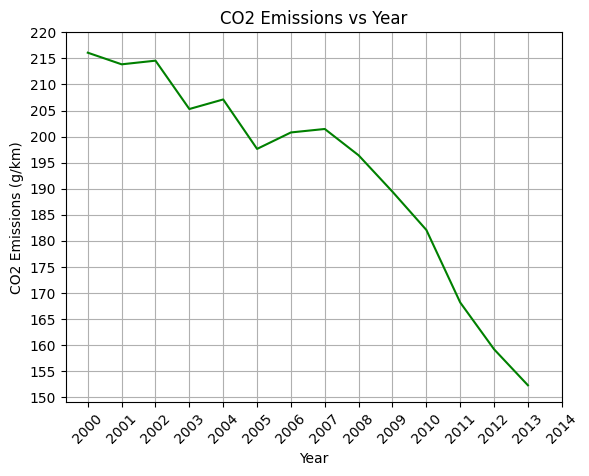

In [10]:
plt.plot(co2_trend.index, co2_trend.values, color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(np.arange(2000, 2015, step=1), rotation=45)
plt.yticks(np.arange(150, 225, step=5))
plt.title('CO2 Emissions vs Year')
plt.grid(True)
plt.show()

In [11]:
high_co2_vehicles = data[['manufacturer', 'model', 'co2']].sort_values(by='co2', ascending=False).head(10)
high_co2_vehicles

,manufacturer,model,co2
2552,Lamborghini,Diablo Model Year 1997,590
696,Lamborghini,Diablo Model Year 1997,590
2557,Lamborghini,Diablo Model Year 1998/1999,575
698,Lamborghini,Diablo Model Year 1998/1999,575
2554,Lamborghini,Diablo Model Year 1998/1999,575
701,Lamborghini,Diablo Model Year 1998/1999,575
2553,Lamborghini,Diablo Model Year 1997,575
695,Lamborghini,Diablo Model Year 1997,575
697,Lamborghini,Diablo Model Year 1997,575
2555,Lamborghini,Diablo Model Year 1998/1999,575


In [12]:
low_co2_vehicles = data[['manufacturer', 'model', 'co2']].sort_values(by='co2').head(10)
low_co2_vehicles

,manufacturer,model,co2
45494,Nissan,Leaf,0
44000,Smart,"fortwo coupé, Model Year 2013",0
43718,Renault,Zoe,0
45493,Mitsubishi,i-MiEV,0
43987,Smart,"fortwo cabrio, Model Year 2013",0
42064,Citroen,C-Zero,0
43661,Renault,Fluence Z.E.,0
44211,Vauxhall,"Ampera, Model Year 2012",27
44210,Vauxhall,"Ampera, Model Year 2012",27
44209,Vauxhall,"Ampera, Model Year 2012",27


In [13]:
euro_standard_trend = data.groupby('year')['euro_standard'].mean()
euro_standard_trend

year
2000    2.308002
2001    2.857076
2002    3.162758
2003    3.278193
2004    3.275422
2005    3.532916
2006    3.727790
2007    3.965982
2008    4.000000
2009    4.082942
2010    4.347297
2011    4.800430
2012    5.011089
2013    5.077083
Name: euro_standard, dtype: float64

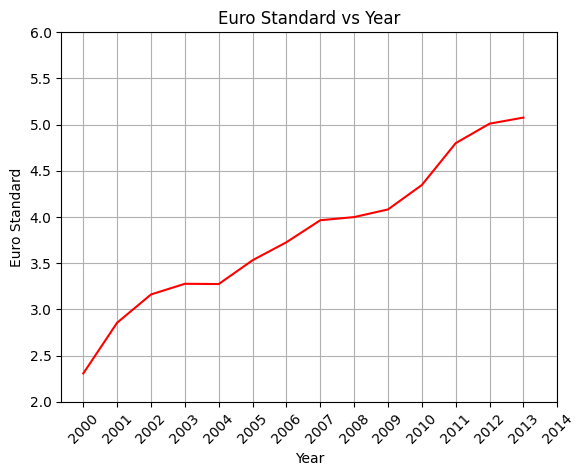

In [14]:
plt.plot(euro_standard_trend.index, euro_standard_trend.values, color='red')
plt.xlabel('Year')
plt.ylabel('Euro Standard')
plt.xticks(np.arange(2000, 2015, step=1), rotation=45)
plt.yticks(np.arange(2, 6.5, step=0.5))
plt.title('Euro Standard vs Year')
plt.grid(True)
plt.show()

In [15]:
fuel_efficiency = data.groupby('year')[['urban_metric', 'extra_urban_metric', 'combined_metric']].mean()
fuel_efficiency

,urban_metric,extra_urban_metric,combined_metric
year,,,
2000,12.237363,6.934715,8.877202
2001,12.064665,6.838827,8.750559
2002,12.146576,6.878846,8.802861
2003,11.591648,6.589178,8.396263
2004,11.778036,6.689289,8.530953
2005,11.080087,6.334249,8.069777
2006,11.180325,6.390803,8.142198
2007,11.144594,6.424823,8.159043
2008,10.870447,6.278230,7.955914


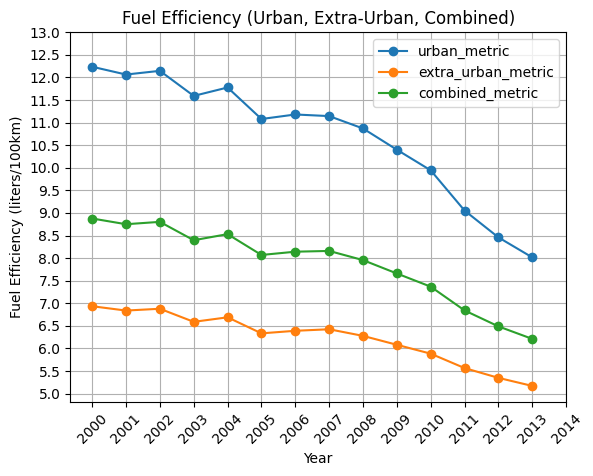

In [16]:
fuel_efficiency.plot(marker='o')
plt.xticks(np.arange(2000, 2015, step=1), rotation=45)
plt.yticks(np.arange(5, 13.5, step=0.5))
plt.title('Fuel Efficiency (Urban, Extra-Urban, Combined)')
plt.xlabel('Year')
plt.ylabel('Fuel Efficiency (liters/100km)')
plt.grid(True)
plt.show()

In [17]:
most_efficient_vehicles = data[['manufacturer', 'model', 'combined_metric']].sort_values(by='combined_metric', ascending=True).head(10)
most_efficient_vehicles

,manufacturer,model,combined_metric
44211,Vauxhall,"Ampera, Model Year 2012",1.2
41951,Chevrolet,Volt,1.2
44210,Vauxhall,"Ampera, Model Year 2012",1.2
44209,Vauxhall,"Ampera, Model Year 2012",1.2
45103,Volvo,"V60, Model Year 2014",1.8
44152,Toyota,Prius,2.1
38910,Hyundai,i20 2012 Facelift,3.2
42520,Hyundai,"i20, 2012 Facelift",3.2
43654,Renault,"Clio 4, 2013",3.2
39068,Kia,Rio 5-door,3.2


In [18]:
largest_engine_capacity = data[['urban_metric', 'extra_urban_metric', 'combined_metric', 'engine_capacity']].sort_values(by='engine_capacity', ascending=False).head(10)
largest_engine_capacity

,urban_metric,extra_urban_metric,combined_metric,engine_capacity
23137,34.5,13.2,21.1,8285.0
16518,34.0,13.2,21.1,8285.0
26656,34.5,13.2,21.1,8285.0
20044,34.5,13.2,21.1,8285.0
190,33.1,12.7,20.2,7990.0
2000,33.1,12.7,20.2,7990.0
20027,22.8,10.0,14.7,7011.0
30481,22.8,10.0,14.7,7011.0
23109,22.8,10.0,14.7,7011.0
16596,22.8,10.0,14.7,7011.0


In [19]:
engine_fuel_corr = data[['engine_capacity', 'combined_metric']].corr()
print("Correlation between Engine Capacity and Fuel Efficiency:\n", engine_fuel_corr)

Correlation between Engine Capacity and Fuel Efficiency:
                  engine_capacity  combined_metric
engine_capacity         1.000000         0.766905
combined_metric         0.766905         1.000000


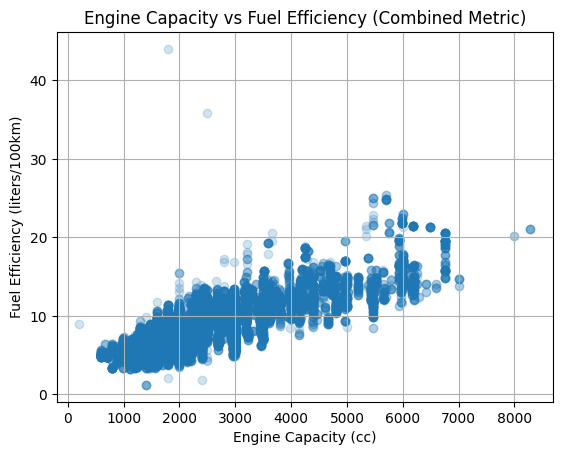

In [20]:
plt.scatter(data['engine_capacity'], data['combined_metric'], alpha=0.2)
plt.title('Engine Capacity vs Fuel Efficiency (Combined Metric)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Fuel Efficiency (liters/100km)')
plt.grid(True)
plt.show()

In [21]:
transmission_efficiency = data.groupby('transmission_type')[['combined_metric', 'co2']].mean()
transmission_efficiency

,combined_metric,co2
transmission_type,,
0,5.928603,139.521994
Automatic,8.569259,209.641579
Manual,7.163007,176.464060


In [22]:
fuel_type_efficiency = data.groupby('fuel_type')[['combined_metric', 'co2']].mean()
fuel_type_efficiency

,combined_metric,co2
fuel_type,,
CNG,9.646774,172.209677
Diesel,6.218259,164.689699
Diesel Electric,4.018182,105.136364
Electricity,7.721963,0.000000
Electricity/Diesel,1.800000,48.000000
Electricity/Petrol,1.380000,31.400000
LPG,11.161905,180.244898
LPG / Petrol,10.315385,167.076923
Petrol,8.658556,205.802726


In [23]:
most_expensive_fuel = data[['fuel_cost_6000_miles', 'manufacturer']].sort_values('fuel_cost_6000_miles', ascending=False).head(1)
most_expensive_fuel

,fuel_cost_6000_miles,manufacturer
8557,3329.0,Vauxhall


In [24]:
filtered_data = data[data['fuel_cost_6000_miles'] > 0]
cheapest_fuel = filtered_data[['fuel_cost_6000_miles', 'manufacturer']].sort_values('fuel_cost_6000_miles').head(1)
cheapest_fuel

,fuel_cost_6000_miles,manufacturer
4502,236.0,Honda


In [25]:
fuel_cost_trend = data.groupby('year')['fuel_cost_6000_miles'].mean()
fuel_cost_trend

year
2000    670.576202
2001    636.442698
2002    610.487191
2003    582.546636
2004    588.781320
2005    610.982869
2006    610.982869
2007    610.982869
2008    610.982869
2009    610.982869
2010    610.982869
2011    610.982869
2012    610.982869
2013    610.982869
Name: fuel_cost_6000_miles, dtype: float64

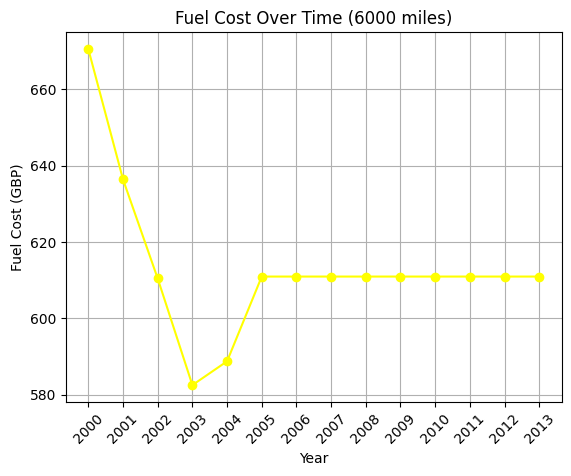

In [26]:
plt.plot(fuel_cost_trend.index, fuel_cost_trend.values, marker='o', color='yellow')
plt.title('Fuel Cost Over Time (6000 miles)')
plt.xlabel('Year')
plt.ylabel('Fuel Cost (GBP)')
plt.xticks(np.arange(2000, 2014, step=1), rotation=45)
plt.grid(True)
plt.show()

In [27]:
emission_efficiency_trend = data.groupby('year')[['combined_metric', 'co2']].mean()
emission_efficiency_trend

,combined_metric,co2
year,,
2000,8.877202,216.088659
2001,8.750559,213.860335
2002,8.802861,214.560976
2003,8.396263,205.290868
2004,8.530953,207.123047
2005,8.069777,197.642818
2006,8.142198,200.799260
2007,8.159043,201.463793
2008,7.955914,196.409243


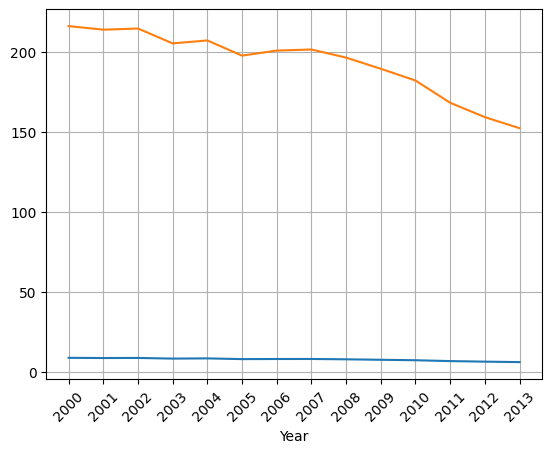

In [28]:
plt.plot(emission_efficiency_trend.index, emission_efficiency_trend.values)
plt.xlabel('Year')
plt.xticks(np.arange(2000, 2014, step=1), rotation=45)
plt.grid(True)
plt.show()

In [29]:
manufacturer_performance = data.groupby('manufacturer')[['combined_metric', 'co2']].mean()
manufacturer_performance

,combined_metric,co2
manufacturer,,
Abarth,6.447368,151.789474
Alfa Romeo,8.536989,207.606452
Aston Martin Lagonda,15.686508,371.619048
Audi,8.126279,199.646015
BMW,7.706830,189.673802
...,...,...
Tata,9.442857,255.571429
Toyota,6.882373,169.801843
Vauxhall,7.110751,174.550858


In [30]:
best_fuel_manufacturer = data[['combined_metric', 'manufacturer']].sort_values('combined_metric', ascending=True).head(1)
best_fuel_manufacturer

,combined_metric,manufacturer
44211,1.2,Vauxhall


In [31]:
filtered_data = data[data['co2'] > 0]
best_co2_manufacturer = filtered_data[['co2', 'manufacturer']].sort_values('co2').head(1)
best_co2_manufacturer

,co2,manufacturer
41951,27,Chevrolet


In [32]:
model_performance = data.groupby('model')[['combined_metric', 'co2']].mean()
model_performance

,combined_metric,co2
model,,
08MY Chrysler 300C,11.550000,282.000000
08MY Chrysler PT Cruiser,9.200000,221.800000
08MY Chrysler Sebring,7.633333,188.666667
08MY Chrysler Voyager,8.050000,212.000000
08MY Jeep Cherokee (KK),11.200000,232.000000
...,...,...
ix20,5.266667,129.733333
ix35,6.142857,156.000000
pro_cee'd,5.380435,134.021739


In [33]:
best_fuel_model = data[['combined_metric', 'model']].sort_values('combined_metric', ascending=True).head(1)
best_fuel_model

,combined_metric,model
44211,1.2,"Ampera, Model Year 2012"


In [34]:
best_co2_model = filtered_data[['co2', 'model']].sort_values('co2').head(1)
best_co2_model

,co2,model
41951,27,Volt


In [35]:
filtered_data = data[data['combined_metric'] > 0]
engine_capacity_analysis = filtered_data[['combined_metric', 'engine_capacity', 'co2']].sort_values('engine_capacity', ascending=False)
engine_capacity_analysis

,combined_metric,engine_capacity,co2
23137,21.1,8285.0,488
16518,21.1,8285.0,488
26656,21.1,8285.0,488
20044,21.1,8285.0,488
190,20.2,7990.0,483
...,...,...,...
8257,5.2,599.0,123
4951,4.9,599.0,118
4950,4.7,599.0,113
886,4.8,599.0,115


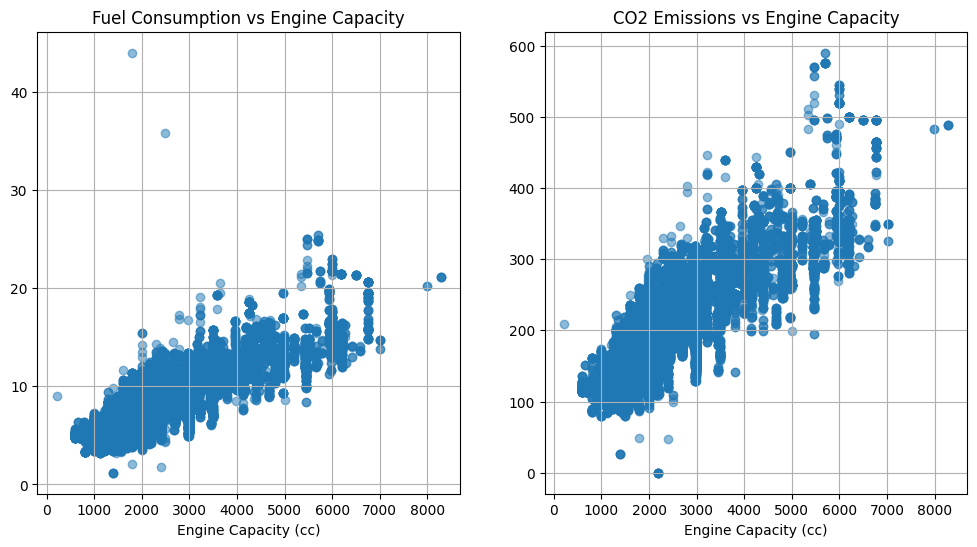

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(engine_capacity_analysis['engine_capacity'], engine_capacity_analysis['combined_metric'], alpha=0.5)
plt.title('Fuel Consumption vs Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(engine_capacity_analysis['engine_capacity'], engine_capacity_analysis['co2'], alpha=0.5)
plt.title('CO2 Emissions vs Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.grid(True)
plt.show()

In [37]:
capacity_co2_fuel_corr = data[['combined_metric', 'engine_capacity', 'co2']].corr()
capacity_co2_fuel_corr

,combined_metric,engine_capacity,co2
combined_metric,1.000000,0.766905,0.977382
engine_capacity,0.766905,1.000000,0.797330
co2,0.977382,0.797330,1.000000


In [38]:
filtered_data = data[data['noise_level'] > 0]
noise_analysis = filtered_data[['co2', 'noise_level', 'combined_metric']].sort_values('noise_level', ascending=False)
noise_analysis

,co2,noise_level,combined_metric
34525,327,83.0,14.1
38368,327,83.0,14.1
33477,154,79.0,5.9
34490,175,78.0,6.6
38301,175,78.0,6.6
...,...,...,...
2166,200,65.0,8.4
21500,140,0.7,5.9
22122,174,0.3,7.3
21515,198,0.2,8.3


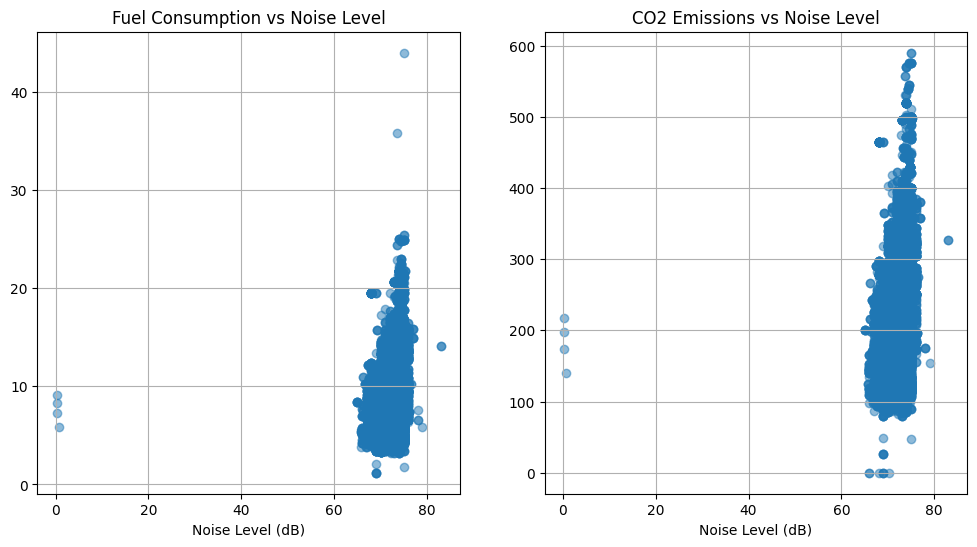

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(noise_analysis['noise_level'], noise_analysis['combined_metric'], alpha=0.5)
plt.title('Fuel Consumption vs Noise Level')
plt.xlabel('Noise Level (dB)')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(noise_analysis['noise_level'], noise_analysis['co2'], alpha=0.5)
plt.title('CO2 Emissions vs Noise Level')
plt.xlabel('Noise Level (dB)')
plt.grid(True)
plt.show()

In [42]:
noise_fuel_co2_corr = data[['co2', 'noise_level', 'combined_metric']].corr()
noise_fuel_co2_corr

,co2,noise_level,combined_metric
co2,1.000000,0.251858,0.977382
noise_level,0.251858,1.000000,0.239642
combined_metric,0.977382,0.239642,1.000000
